In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Nanditha95/Weather-/main/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X_features = df.columns


In [ ]:
X_features = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
X_features

['Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']

In [ ]:
new_df = df[X_features]

In [ ]:
new_df.head(10)

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.89,14.1197,251.0,15.8263,1015.13
1,0.86,14.2646,259.0,15.8263,1015.63
2,0.89,3.9284,204.0,14.9569,1015.94
3,0.83,14.1036,269.0,15.8263,1016.41
4,0.83,11.0446,259.0,15.8263,1016.51
5,0.85,13.9587,258.0,14.9569,1016.66
6,0.95,12.3648,259.0,9.9820,1016.72
7,0.89,14.1519,260.0,9.9820,1016.84
8,0.82,11.3183,259.0,9.9820,1017.37
9,0.72,12.5258,279.0,9.9820,1017.22


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = sm.add_constant(new_df)
y = df['Temperature (C)']
train_X, test_X, train_y, test_y = train_test_split( X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 100 )

In [ ]:
model_1 = sm.OLS(train_y, train_X).fit()
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                 OLS                Adj. R-squared:       0.451      
Dependent Variable:    Temperature (C)    AIC:                  521259.2419
Date:                  2021-08-31 11:45   BIC:                  521314.7638
No. Observations:      77162              Log-Likelihood:       -2.6062e+05
Df Model:              5                  F-statistic:          1.268e+04  
Df Residuals:          77156              Prob (F-statistic):   0.00       
R-squared:             0.451              Scale:                50.271     
---------------------------------------------------------------------------
                        Coef.   Std.Err.     t     P>|t|   [0.025   0.975] 
---------------------------------------------------------------------------
const                   32.2310   0.2683  120.1285 0.0000  31.7051  32.7568
Humidity               -29.2635   0.1438 -203.5069 0.0000 -29.5453 -28.9817
Wind Speed (km/h)       -0.2047   0.0038  -53.6505 0.0000  -0.2121  -0.1972
Wind Bearing (degrees)   0.0032   0.0002   13.5395 0.0000   0.0028   0.0037
Visibility (km)          0.4238   0.0066   64.4853 0.0000   0.4110   0.4367
Pressure (millibars)    -0.0016   0.0002   -7.2488 0.0000  -0.0020  -0.0012
---------------------------------------------------------------------------
Omnibus:                2588.167         Durbin-Watson:            1.995   
Prob(Omnibus):          0.000            Jarque-Bera (JB):         2873.166
Skew:                   -0.452           Prob(JB):                 0.000   
Kurtosis:               3.273            Condition No.:            11262   
===========================================================================
* The condition number is large (1e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors( X ):
  X_matrix = X.to_numpy()
  vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
  vif_factors = pd.DataFrame()
  vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif_factors['column'] = X.columns
  vif_factors['vif'] = vif
  return vif_factors

In [ ]:
vif_factors = get_vif_factors( X[X_features] )
vif_factors

,column,vif
0,Humidity,13.876773
1,Wind Speed (km/h),3.446279
2,Wind Bearing (degrees),4.037040
3,Visibility (km),7.386801
4,Pressure (millibars),26.870380


In [ ]:
columns_with_large_vif = vif_factors[vif_factors.vif > 8].column
columns_with_large_vif

0                Humidity
4    Pressure (millibars)
Name: column, dtype: object

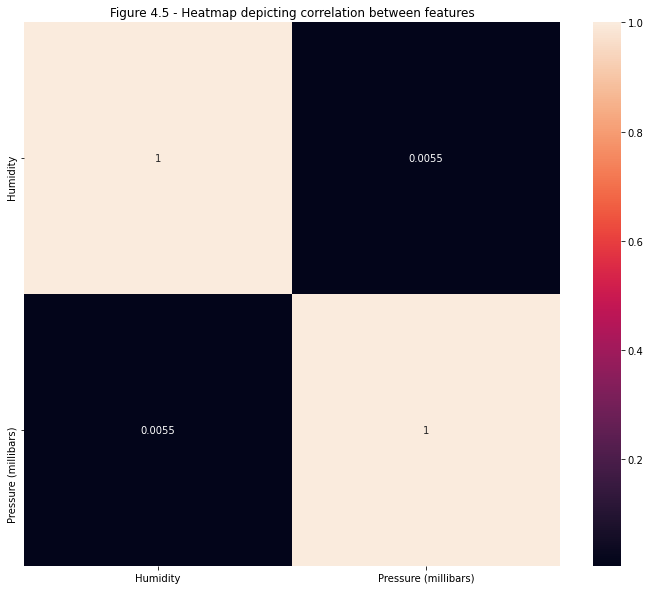

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

plt.figure( figsize = (12,10) )
sn.heatmap( X[columns_with_large_vif].corr(), annot = True );
plt.title( "Figure 4.5 - Heatmap depicting correlation between features");

In [ ]:
columns_to_be_removed = ['Humidity', 'Pressure (millibars)' ]

In [ ]:
X_new_features = list( set(X_features) - set(columns_to_be_removed) )
get_vif_factors( X[X_new_features] )

,column,vif
0,Wind Bearing (degrees),3.261742
1,Wind Speed (km/h),3.085818
2,Visibility (km),3.863284


In [ ]:
train_X = train_X[X_new_features]
model_2 = sm.OLS(train_y, train_X).fit()
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.665      
Dependent Variable:     Temperature (C)  AIC:                         555190.7259
Date:                   2021-08-31 11:47 BIC:                         555218.4869
No. Observations:       77162            Log-Likelihood:              -2.7759e+05
Df Model:               3                F-statistic:                 5.114e+04  
Df Residuals:           77159            Prob (F-statistic):          0.00       
R-squared (uncentered): 0.665            Scale:                       78.040     
-----------------------------------------------------------------------------------
                           Coef.    Std.Err.      t       P>|t|     [0.025   0.975]
-----------------------------------------------------------------------------------
Wind Bearing (degrees)     0.0049     0.0003    18.5583   0.0000    0.0044   0.0054
Wind Speed (km/h)          0.0004     0.0044     0.0856   0.9318   -0.0082   0.0089
Visibility (km)            1.0380     0.0056   185.5303   0.0000    1.0271   1.0490
---------------------------------------------------------------------------------
Omnibus:                  459.250            Durbin-Watson:               1.996  
Prob(Omnibus):            0.000              Jarque-Bera (JB):            411.362
Skew:                     0.136              Prob(JB):                    0.000  
Kurtosis:                 2.767              Condition No.:               42     
=================================================================================

"""

In [ ]:
sig_var = ['Wind Bearing (degrees)', 'Visibility (km)']

In [ ]:
train_X = train_X[sig_var]
model_3 = sm.OLS(train_y, train_X).fit()
model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.665      
Dependent Variable:     Temperature (C)  AIC:                         555188.7332
Date:                   2021-08-31 11:47 BIC:                         555207.2405
No. Observations:       77162            Log-Likelihood:              -2.7759e+05
Df Model:               2                F-statistic:                 7.672e+04  
Df Residuals:           77160            Prob (F-statistic):          0.00       
R-squared (uncentered): 0.665            Scale:                       78.039     
-----------------------------------------------------------------------------------
                            Coef.    Std.Err.      t       P>|t|    [0.025   0.975]
-----------------------------------------------------------------------------------
Wind Bearing (degrees)      0.0049     0.0003    19.5547   0.0000   0.0044   0.0054
Visibility (km)             1.0383     0.0049   212.2983   0.0000   1.0287   1.0479
---------------------------------------------------------------------------------
Omnibus:                  458.899            Durbin-Watson:               1.996  
Prob(Omnibus):            0.000              Jarque-Bera (JB):            411.102
Skew:                     0.136              Prob(JB):                    0.000  
Kurtosis:                 2.767              Condition No.:               33     
=================================================================================

"""

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<Figure size 1080x936 with 0 Axes>

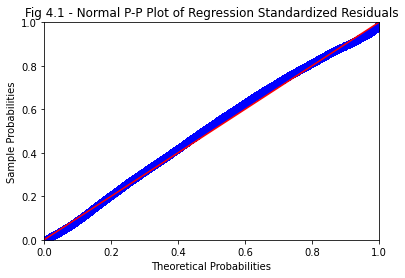

In [ ]:
model_1_resid = model_1.resid
probplot = sm.ProbPlot( model_1_resid )
plt.figure( figsize = (15, 13) )
probplot.ppplot( line='45' )
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

In [ ]:
def get_standardized_values( vals ):return (vals - vals.mean())/vals.std()

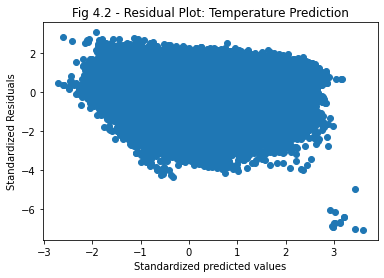

In [ ]:
plt.scatter( get_standardized_values( model_1.fittedvalues ),
get_standardized_values( model_1_resid ) )
plt.title( "Fig 4.2 - Residual Plot: Temperature Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

In [ ]:
from scipy.stats import zscore

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
df['Temperature (C)'].astype('int64')

0         9
1         9
2         9
3         8
4         8
         ..
96448    26
96449    24
96450    22
96451    21
96452    20
Name: Temperature (C), Length: 96453, dtype: int64

In [ ]:
df['Z_score_Temperature_(C)'] = zscore( df['Temperature (C)'] )


In [ ]:
new_df = df[(df['Z_score_Temperature_(C)']  < 3.0) | (df['Z_score_Temperature_(C)']  > -3.0) ] 
new_df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Z_score_Temperature_(C)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,-0.257599
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,-0.269814
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,-0.267487
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,-0.381489
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,-0.332631
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.,-0.283773
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.,-0.439653
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.,-0.330886
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.,-0.116260
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.,0.192592
